# Import libraries

Pandas will be used to to work with the DataFrames. Matplotlib and seaborn are libraries that allows us plot charts and graphics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


We open an csv file, with a determined Cryptocurrency historical data edited, with a determined sequence (ten previous candles and ten subsequent). Also have the technical indicators.
In this case, we'll use BTCUSDT ADAUSDT XMRUSDT ETHUSDT BNBUSDT, downloaded with **call_bina.py** as follows:

**call_bina.py ADAUSDT base 2021 2 2 30m**

It means, ADAUSDT Cryptocurrency historical data, since 2021 february 2nd with a interval of 30m. Done this for each case

In [295]:
file = pd.read_csv(f"analysis/analysis_2022-07-17_12_31.csv")


In [274]:
file.head()
file.columns

Index(['Unnamed: 0', 'volume_0', 'mart_0', 'mart_inv_0', 'ampl_2_0', 'rsi_0',
       'macd_0', 'macd_h0', 'macd_s0', 'volume_1', 'mart_1', 'mart_inv_1',
       'ampl_2_1', 'rsi_1', 'macd_1', 'macd_h1', 'macd_s1', 'volume_2',
       'mart_2', 'mart_inv_2', 'ampl_2_2', 'rsi_2', 'macd_2', 'macd_h2',
       'macd_s2', 'volume_3', 'mart_3', 'mart_inv_3', 'ampl_2_3', 'rsi_3',
       'macd_3', 'macd_h3', 'macd_s3', 'volume_4', 'mart_4', 'mart_inv_4',
       'ampl_2_4', 'rsi_4', 'macd_4', 'macd_h4', 'macd_s4', 'volume_5',
       'mart_5', 'mart_inv_5', 'ampl_2_5', 'rsi_5', 'macd_5', 'macd_h5',
       'macd_s5', 'volume_6', 'mart_6', 'mart_inv_6', 'ampl_2_6', 'rsi_6',
       'macd_6', 'macd_h6', 'macd_s6', 'volume_7', 'mart_7', 'mart_inv_7',
       'ampl_2_7', 'rsi_7', 'macd_7', 'macd_h7', 'macd_s7', 'volume_8',
       'mart_8', 'mart_inv_8', 'ampl_2_8', 'rsi_8', 'macd_8', 'macd_h8',
       'macd_s8', 'volume_9', 'mart_9', 'mart_inv_9', 'ampl_2_9', 'rsi_9',
       'macd_9', 'macd_h9', 'macd_s9'

 Here we make an quick analisis of the data

In [296]:
file.describe()

,Unnamed: 0,volume_0,mart_0,mart_inv_0,ampl_2_0,rsi_0,macd_0,macd_h0,macd_s0,volume_1,...,macd_s10,slope_prev,slope_prev_short,slope_next_short,high,low,close,mean_rel_15_30,mean_rel_30_60,mean_rel_60_100
count,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,...,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000,237829.000000
mean,118914.000000,1.021865,-0.000008,0.000014,1.009845,50.571821,0.384851,0.001232,0.383619,1.019422,...,0.380145,0.048335,0.055183,0.056588,0.015465,-0.016411,0.000255,1.000035,1.000166,1.000241
std,68655.462923,0.914409,0.007862,0.007444,0.009780,11.567610,99.194965,29.372184,93.601872,0.900038,...,93.602646,6.521995,30.845120,30.845944,0.018580,0.020698,0.014162,0.003744,0.010721,0.012308
min,0.000000,0.000000,-0.188091,-0.292138,1.000000,5.437936,-1958.764639,-567.743831,-1748.774165,0.000000,...,-1748.774165,-60.252229,-799.020909,-799.020909,-0.001997,-0.583784,-0.211312,0.956954,0.878998,0.874102
25%,59457.000000,0.532967,-0.002967,-0.002816,1.004742,43.199681,-1.462469,-0.556348,-1.400885,0.533901,...,-1.401805,-0.114266,-0.465455,-0.464848,0.004455,-0.020745,-0.005433,0.998513,0.995616,0.994765
50%,118914.000000,0.777705,-0.000037,0.000037,1.007423,50.579495,0.003777,0.000091,0.003497,0.778018,...,0.003504,0.000389,0.000685,0.000691,0.010002,-0.010363,0.000190,1.000079,1.000297,1.000402
75%,178371.000000,1.188165,0.002837,0.002945,1.011807,57.906668,2.139706,0.553647,2.044175,1.187183,...,2.043215,0.164246,0.592727,0.593939,0.019898,-0.004549,0.005950,1.001683,1.005123,1.006251
max,237828.000000,44.462453,0.607025,0.152649,2.077873,97.791673,1372.430567,504.052103,1236.465932,42.977000,...,1236.465932,53.767811,635.365636,635.365636,0.649852,0.001672,0.278352,1.035008,1.108945,1.105917


To see if is there a correlation we need to make a grapf
file_x is a list with names of the columns that we want to graph

In [5]:
file_x = [file[[f"rsi_{x}",f"mart_{x}","slope_prev_short",f"volume_{x}",f"macd_s{x}",f"macd_{x}","mean_rel_30_60","mean_rel_60_100","mean_rel_15_30","high"]] for x in range(0,6)]


The tool we use to see if is a correlation in the variables is pairplot

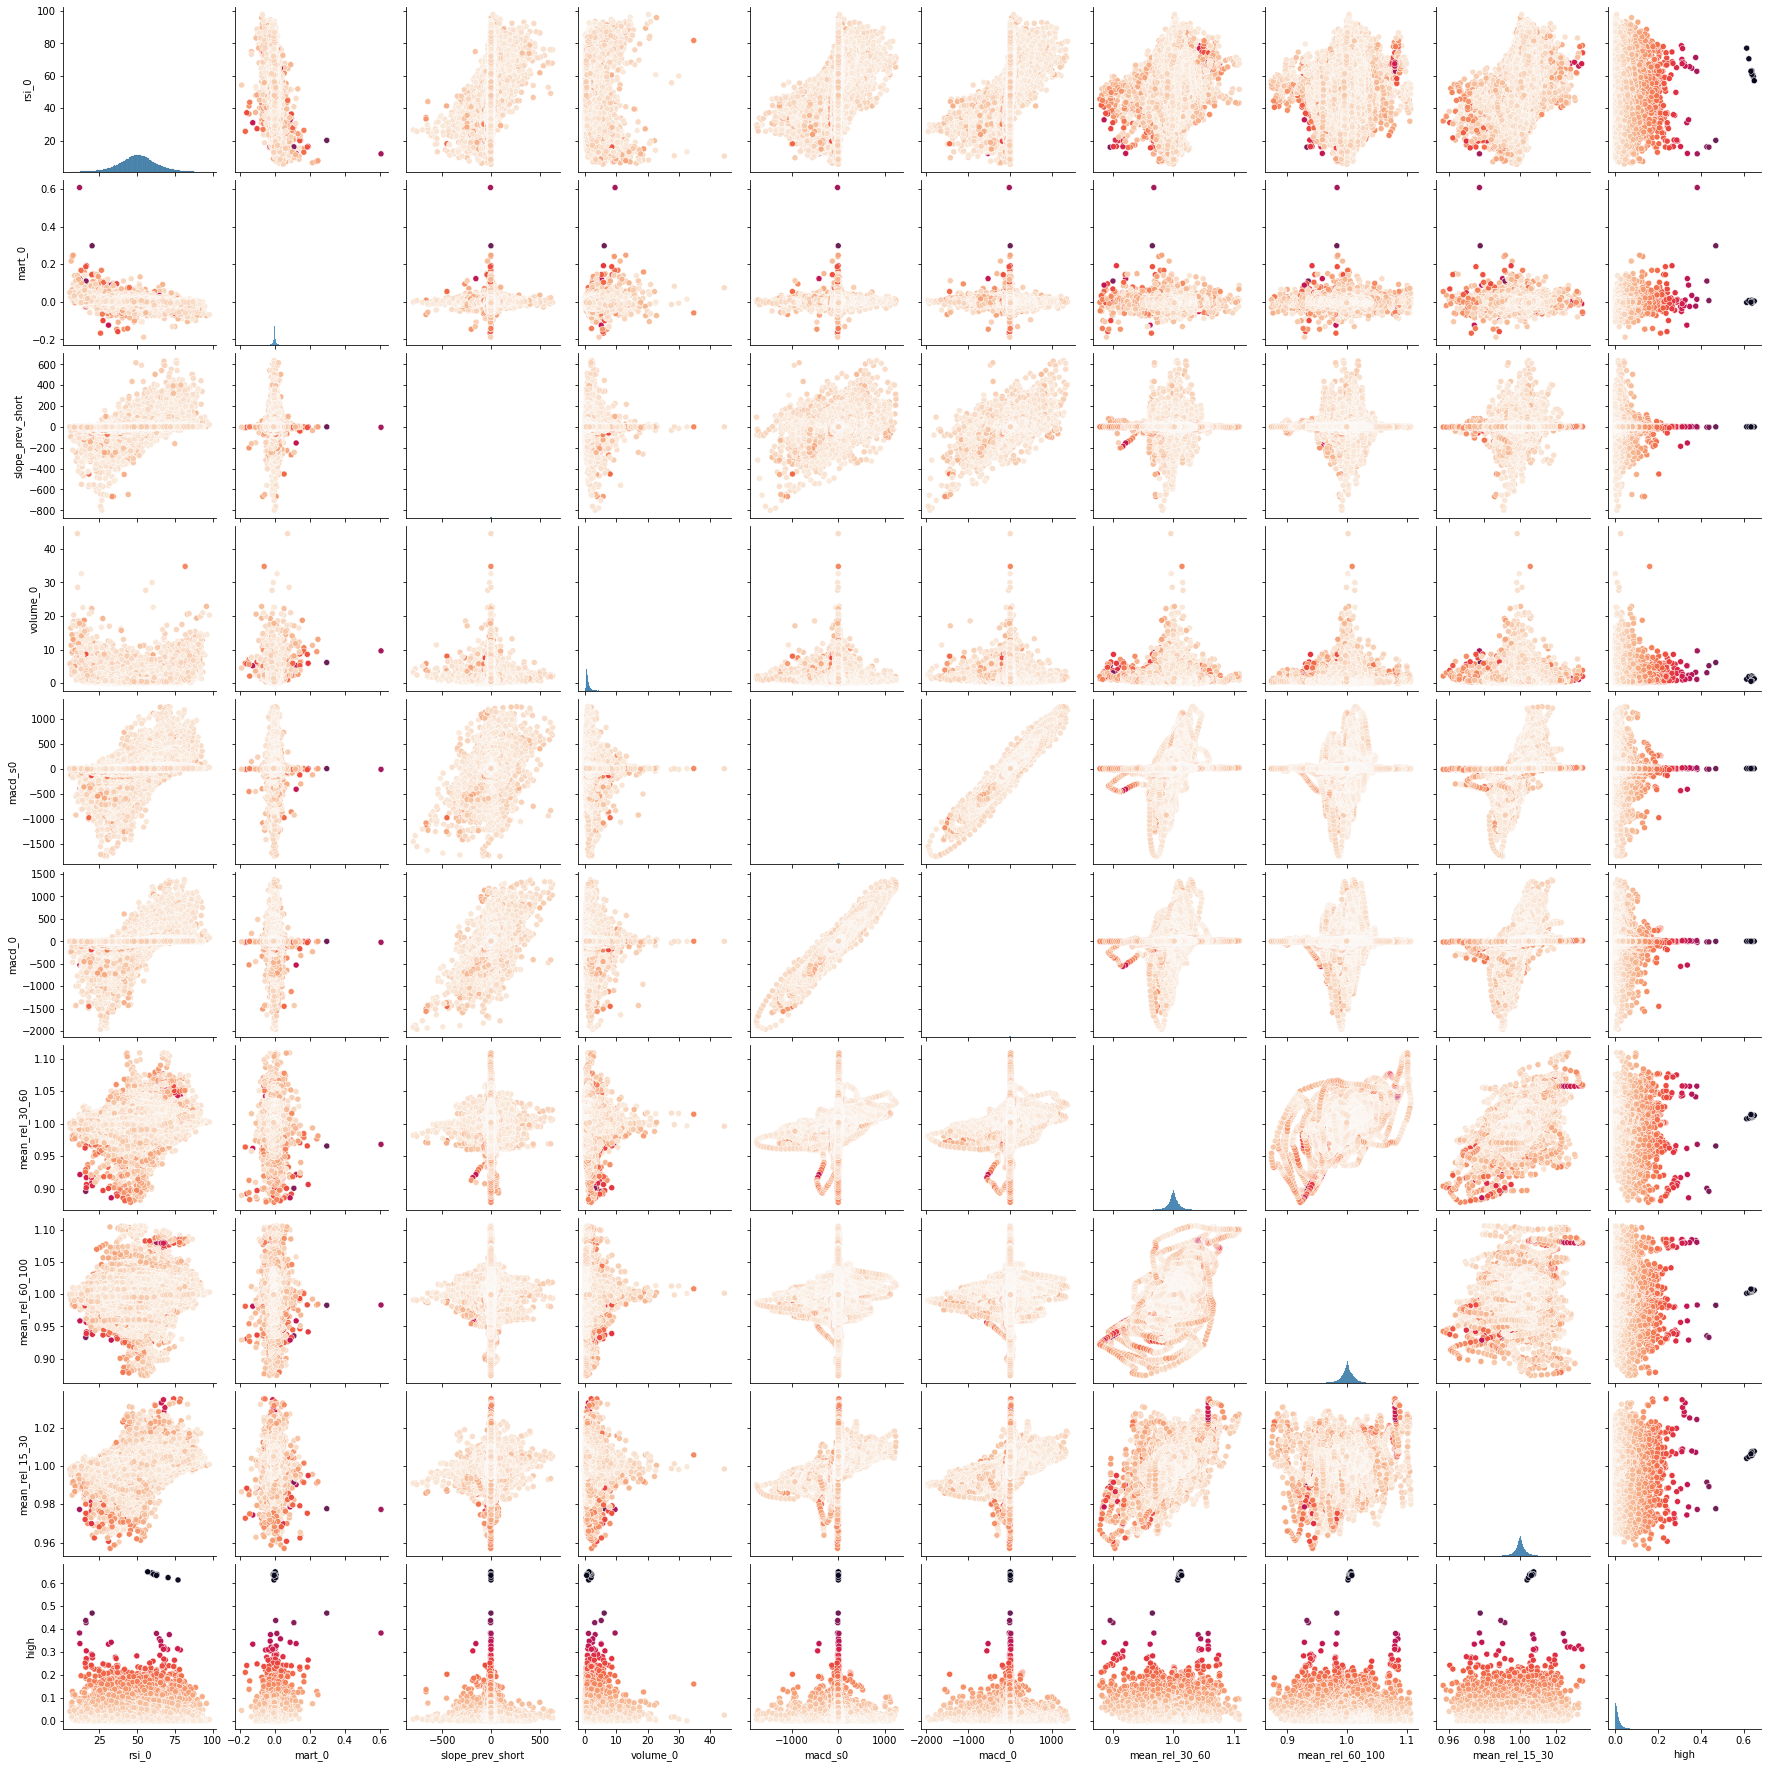

In [6]:
sns.pairplot(file_x[0],
            plot_kws=dict(
            hue = file_x[0]["high"],
            palette = "rocket_r"))


In a first seek we can see that we have sole values like an increment of 0.2 or a decrease of -0.25, that are rare or outliers,  so we need to eliminate them before make the model

In [310]:

file_1 = file[file["close"] < .1]
file_1 = file_1[file_1["close"] > -.1]


In [324]:
file_1.describe()

,Unnamed: 0,volume_0,mart_0,mart_inv_0,ampl_2_0,rsi_0,macd_0,macd_h0,macd_s0,volume_1,...,slope_next_short,high,low,close,mean_rel_15_30,mean_rel_30_60,mean_rel_60_100,day,hour,high_3
count,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,...,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000,237606.000000
mean,118891.368732,1.020649,-0.000019,0.000023,1.009797,50.579455,0.409752,0.007923,0.401829,1.018587,...,0.052205,0.015357,-0.016291,0.000248,1.000042,1.000181,1.000249,2.998350,11.512281,0.130822
std,68655.235365,0.909742,0.007660,0.007350,0.009085,11.558747,99.166740,29.354849,93.594388,0.898711,...,30.760268,0.017754,0.019757,0.013595,0.003710,0.010633,0.012246,2.000046,6.921591,0.337206
min,0.000000,0.000000,-0.188091,-0.184493,1.000000,5.437936,-1958.764639,-567.743831,-1748.774165,0.000000,...,-799.020909,-0.001997,-0.578622,-0.100000,0.956954,0.878998,0.874102,0.000000,0.000000,0.000000
25%,59425.250000,0.532780,-0.002966,-0.002812,1.004740,43.211825,-1.459524,-0.556371,-1.397922,0.533758,...,-0.464485,0.004454,-0.020729,-0.005426,0.998516,0.995625,0.994777,1.000000,6.000000,0.000000
50%,118895.500000,0.777328,-0.000038,0.000038,1.007418,50.584873,0.003821,0.000093,0.003536,0.777724,...,0.000690,0.009997,-0.010358,0.000190,1.000080,1.000299,1.000405,3.000000,12.000000,0.000000
75%,178345.750000,1.187413,0.002833,0.002944,1.011793,57.906991,2.141615,0.554077,2.046372,1.186337,...,0.593015,0.019876,-0.004548,0.005942,1.001682,1.005122,1.006251,5.000000,18.000000,0.000000
max,237828.000000,44.462453,0.247421,0.152649,1.400261,97.791673,1372.430567,504.052103,1236.465932,42.977000,...,635.365636,0.644970,0.001672,0.099983,1.035008,1.108801,1.105917,6.000000,23.000000,1.000000


Another variable that we can use is the hour and the day (monday, thursday,wednesday, etc) of each candle, so let's do that

In [311]:
from datetime import datetime
def weekday_convert(row):
    date_time_obj = datetime. strptime(row, '%Y-%m-%d %H:%M:%S')
    return date_time_obj.weekday()
def hour_convert(row):
    date_time_obj = datetime. strptime(row, '%Y-%m-%d %H:%M:%S')
    return date_time_obj.hour

file_1["day"] = file_1["date"].apply(weekday_convert)

file_1["hour"] = file_1["date"].apply(hour_convert)

Takig in count that: 

0 = monday

1 = tuesday

2 = wednesday ...

First, we will try with this columns:

In [325]:
columns_cut_dummies = ["hour",'volume_0', 'mart_0', 'ampl_2_0', 'rsi_0',
                       'macd_0', 'macd_h0', 'macd_s0',"mart_inv_0",
                     'volume_1', 'mart_1', 'ampl_2_1', 'rsi_1',
                       'macd_1', 'macd_h1', 'macd_s1',"mart_inv_1",
                     'volume_2', 'mart_2', 'ampl_2_2', 'rsi_2',
                       'macd_2', 'macd_h2', 'macd_s2',"mart_inv_2",
                     'volume_3', 'mart_3', 'ampl_2_3', 'rsi_3',
                       'macd_3', 'macd_h3', 'macd_s3',"mart_inv_3",
                     'volume_4', 'mart_4', 'ampl_2_4', 'rsi_4',
                       'macd_4', 'macd_h4', 'macd_s4',"mart_inv_4",
                     'mean_rel_15_30', 'mean_rel_30_60',
                     'mean_rel_60_100','slope_prev_short',
                     'slope_prev','high']

Here we have another more specific chart

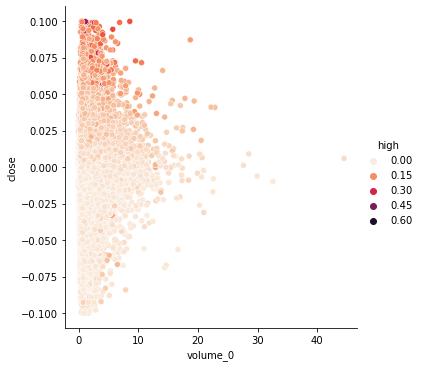

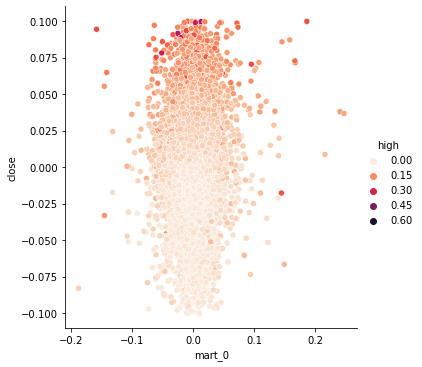

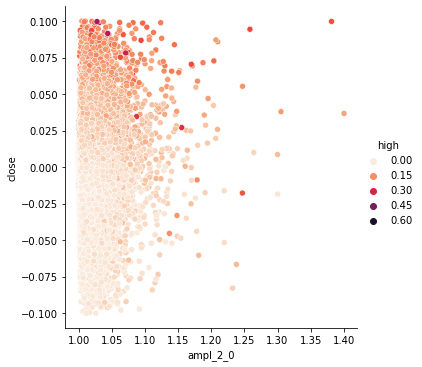

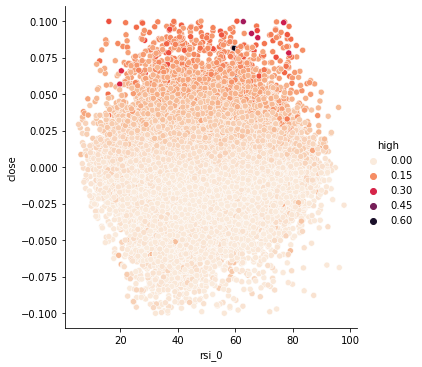

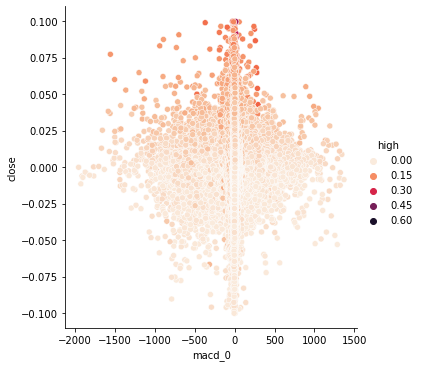

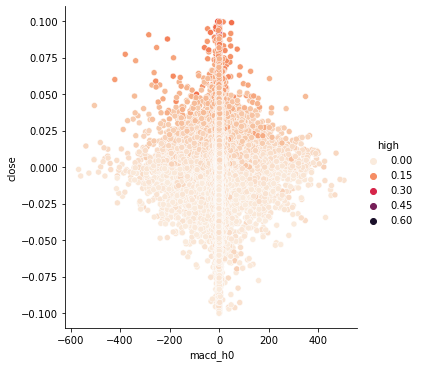

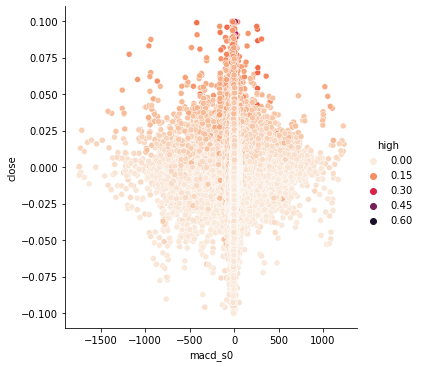

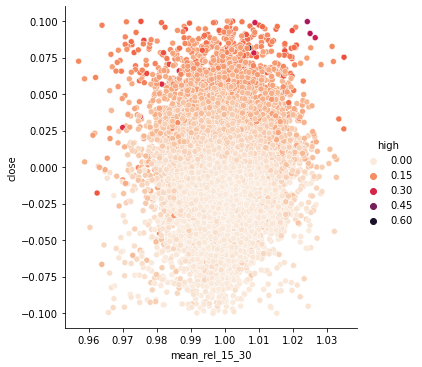

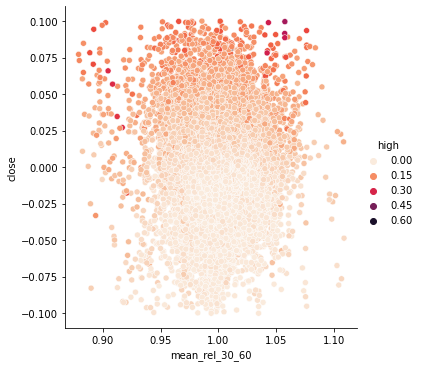

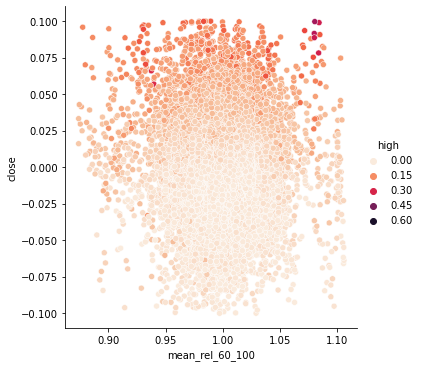

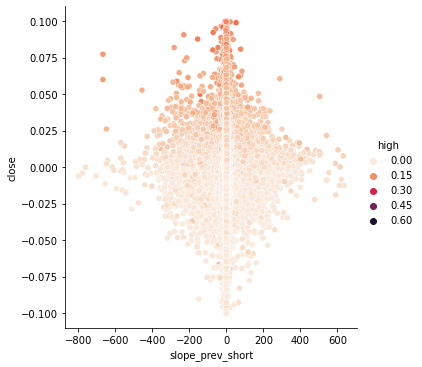

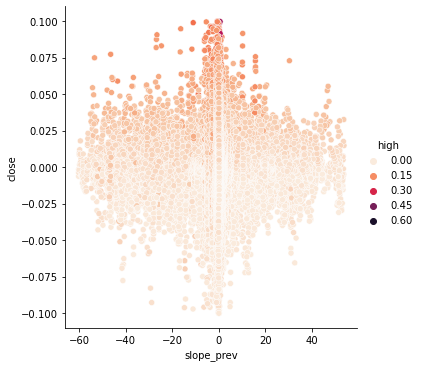

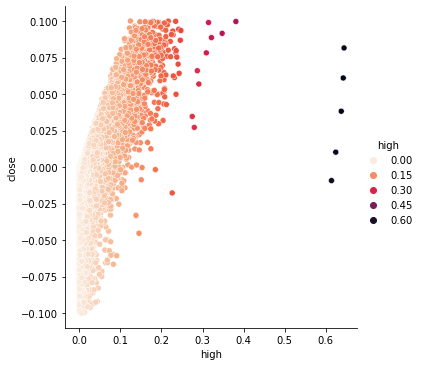

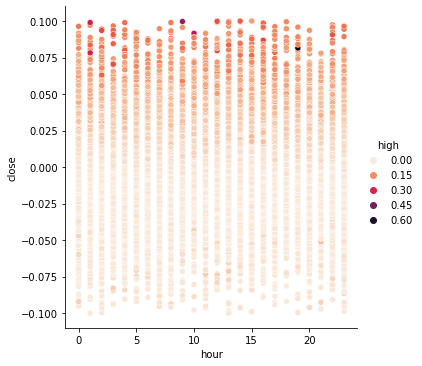

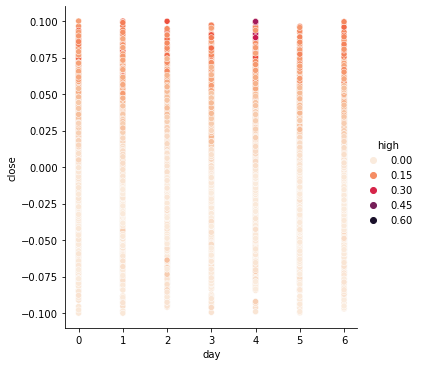

In [139]:
for i in columns_cut_dummies:
    sns.relplot(x=i, y="close",hue="high",data = file_1 ,palette = "rocket_r")

Now, let's convert each continuous variable to an cateregorical one, using ten segments

In [315]:

for i in columns_cut_dummi:
    
    sep = (file_1[i].max() - file_1[i].min()) / 11
    
    file_1[f"{i}_cut"] = pd.cut(x=file_1[i], bins=[file_1[i].min() + k * sep for k in range(0,12) ],
                                
                    labels=[-5,-4,-3,-2,-1,0, 1, 2, 3,4,5])
 


These are the columns we'll use to make the model

In [316]:
features = ['volume_0_cut', 'mart_0_cut',  'ampl_2_0_cut','rsi_0_cut', 
            'macd_0_cut', 'macd_h0_cut', 'macd_s0_cut','mart_inv_0_cut',
            'volume_1_cut', 'mart_1_cut', 'ampl_2_1_cut',
               'rsi_1_cut', 'macd_1_cut', 'macd_h1_cut', 
                'macd_s1_cut','mart_inv_1_cut', 
                'volume_2_cut', 'mart_2_cut', 
                'ampl_2_2_cut', 'rsi_2_cut', 
                'macd_2_cut', 'macd_h2_cut', 
                'macd_s2_cut', 'mart_inv_2_cut',
                'volume_3_cut', 'mart_3_cut', 
                'ampl_2_3_cut', 'rsi_3_cut', 
                'macd_3_cut', 'macd_h3_cut', 
                'macd_s3_cut', 'mart_inv_3_cut',
                'volume_4_cut', 'mart_4_cut', 
                'ampl_2_4_cut', 'rsi_4_cut', 
                'macd_4_cut', 'macd_h4_cut', 
                'macd_s4_cut', 'mart_inv_4_cut',
            'mean_rel_15_30_cut', 'mean_rel_30_60_cut',
            'mean_rel_60_100_cut', 'slope_prev_short_cut', 'slope_prev_cut',"hour","day"]

 With the "high" value of each candle we can decide if the next ones candels have increase it's prices in a 3% in this case, or just don't

In [317]:
def max_i(row):
    if row > .03:
        return 1
    else:
        return 0
    
file_1["high_3"] = file_1["high"].apply(max_i)

 Once we have the columns with the variables and the target, it's time to create the model.

In [318]:
y = file_1["high_3"]

In [319]:
X = pd.get_dummies(file_1[features])


In [320]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

 Here we divide our data to train the model and to test it, this is 30% test 70% train

In [321]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3,random_state = 10)

 To find the best max_depth value, we must iterate through increasing values until find someone that give us the best precision and recall without overfitting the model

In [323]:
for i in range(50,110,10):
    model = RandomForestClassifier(n_estimators=130, max_depth=i, random_state=1)
    model.fit(X, y)
    predictions = model.predict(X_test)
    print( f"depth = {i}  {classification_report(y_test,predictions)}" )

depth = 50                precision    recall  f1-score   support

           0       0.96      1.00      0.98     61930
           1       1.00      0.70      0.82      9352

    accuracy                           0.96     71282
   macro avg       0.98      0.85      0.90     71282
weighted avg       0.96      0.96      0.96     71282

depth = 60                precision    recall  f1-score   support

           0       0.98      1.00      0.99     61930
           1       0.99      0.86      0.92      9352

    accuracy                           0.98     71282
   macro avg       0.99      0.93      0.95     71282
weighted avg       0.98      0.98      0.98     71282

depth = 70                precision    recall  f1-score   support

           0       0.98      1.00      0.99     61930
           1       0.99      0.87      0.93      9352

    accuracy                           0.98     71282
   macro avg       0.98      0.94      0.96     71282
weighted avg       0.98      0.98     

 So we find that our searched max_depth value is 90

 Now we can set this to **amplitudes.py**